<a href="https://colab.research.google.com/github/elli0tw/Python-Final-Project-California-Housing-Price-Analysis/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# California Housing Price Analysis  
**Course:** MATH 120  
**Author:** Elliot Wiley  
**Dataset:** Zillow California Housing Data  

This notebook explores housing price trends across California using Zillow data.  
We will clean the data, visualize trends, and build a simple regression model.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
file_path = '/content/drive/My Drive/Fall 120/data_raw/zillow_housing_raw.csv'
df = pd.read_csv(file_path)

In [8]:
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30,2025-07-31,2025-08-31,2025-09-30,2025-10-31
0,102001,0,United States,country,NaN,122095.338389,122310.143231,122576.532861,123147.886331,123805.445673,...,362348.966564,362807.919409,362533.073508,362005.958620,361321.678348,360705.615411,360279.804203,360052.608231,360293.712117,360727.121788
1,394913,1,"New York, NY",msa,NY,219565.593260,220498.623149,221440.294575,223348.485266,225324.482808,...,689682.577780,690983.193638,692691.217545,695141.260958,696921.202994,698406.123120,699586.052632,700381.032667,701790.451814,704140.723119
2,753899,2,"Los Angeles, CA",msa,CA,221432.437164,222256.446781,223354.019733,225537.821205,227926.215390,...,963545.812288,961517.697095,956424.504253,952110.252154,947340.204517,942988.929116,940398.465432,939327.828380,940383.909291,942798.595192
3,394463,3,"Chicago, IL",msa,IL,153343.175465,153485.126575,153755.474965,154428.034572,155237.042883,...,328627.381612,329973.195016,330818.586508,331419.158957,331709.573240,332070.288234,332909.054962,333904.160604,335236.319083,336540.250584
4,394514,4,"Dallas, TX",msa,TX,127434.269550,127491.029219,127556.280269,127725.730391,127949.145738,...,374885.871571,374099.667668,372599.443330,370475.677803,368063.324701,365702.998441,363689.498266,362329.533893,361683.472342,361335.422264


In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Columns: 315 entries, RegionID to 2025-10-31
dtypes: float64(310), int64(2), object(3)
memory usage: 2.2+ MB


,RegionID,SizeRank,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,...,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30,2025-07-31,2025-08-31,2025-09-30,2025-10-31
count,895.000000,895.000000,431.000000,432.000000,433.000000,435.000000,437.000000,438.000000,439.000000,440.000000,...,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02
mean,412099.672626,461.751955,109493.645177,109672.863386,109828.394900,110515.663164,111249.872961,111814.718076,112595.738903,113218.163702,...,2.890802e+05,2.897624e+05,2.897609e+05,2.894265e+05,2.890288e+05,2.886941e+05,2.886171e+05,2.886362e+05,2.889805e+05,2.894909e+05
std,78377.355083,268.710532,46773.631018,46886.353507,47077.342899,47740.390911,48336.813185,48957.565968,49683.145969,50420.431372,...,1.766354e+05,1.763762e+05,1.759355e+05,1.755924e+05,1.750870e+05,1.744864e+05,1.738639e+05,1.735086e+05,1.736621e+05,1.742366e+05
min,102001.000000,0.000000,44195.075861,44220.637247,44323.732896,44525.489100,44801.138921,45136.777518,45468.586116,45715.799552,...,5.235916e+04,5.266125e+04,5.291292e+04,5.271870e+04,5.246951e+04,5.205357e+04,5.049471e+04,4.866230e+04,4.781248e+04,4.772882e+04
25%,394546.000000,230.500000,79017.267917,79110.970514,79223.776425,79399.574364,79780.247287,80036.203387,80338.454595,80510.683874,...,1.812361e+05,1.818667e+05,1.823702e+05,1.819291e+05,1.819810e+05,1.817825e+05,1.818565e+05,1.820520e+05,1.826097e+05,1.831380e+05
50%,394795.000000,460.000000,98264.833940,98437.241004,98432.061590,98482.287613,98990.319082,99332.949204,99669.324418,100138.657763,...,2.401539e+05,2.412682e+05,2.416470e+05,2.420442e+05,2.421644e+05,2.426847e+05,2.429970e+05,2.429246e+05,2.433883e+05,2.435711e+05
75%,395044.500000,689.500000,126619.672675,126924.665592,127054.387119,127428.456549,127949.145738,128462.399625,129405.543058,130073.037945,...,3.415099e+05,3.423541e+05,3.425149e+05,3.423189e+05,3.420882e+05,3.422562e+05,3.422921e+05,3.415326e+05,3.417426e+05,3.417162e+05
max,753929.000000,939.000000,359898.002852,361752.885822,364547.233085,372114.526174,380048.369350,389138.642858,396964.547201,406597.379415,...,1.611705e+06,1.607400e+06,1.595523e+06,1.583490e+06,1.566718e+06,1.549364e+06,1.537614e+06,1.533864e+06,1.539074e+06,1.549613e+06


In [11]:
ca_df = df[df["StateName"] == "CA"]
ca_df.shape

(34, 315)

In [12]:
ca_df = ca_df.dropna(thresh=int(0.75 * ca_df.shape[1]))
ca_df = ca_df.fillna(method="ffill")

ca_df.isna().sum().head()

/tmp/ipython-input-2298749272.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ca_df = ca_df.fillna(method="ffill")


,0
RegionID,0
SizeRank,0
RegionName,0
RegionType,0
StateName,0


In [14]:
clean_path = "/content/drive/My Drive/Fall 120/data_raw/zillow_california_clean.csv"
ca_df.to_csv(clean_path, index=False)

In [17]:
city = "Los Angeles, CA"
city_data = ca_df[ca_df["RegionName"] == city]

city_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30,2025-07-31,2025-08-31,2025-09-30,2025-10-31
2,753899,2,"Los Angeles, CA",msa,CA,221432.437164,222256.446781,223354.019733,225537.821205,227926.21539,...,963545.812288,961517.697095,956424.504253,952110.252154,947340.204517,942988.929116,940398.465432,939327.82838,940383.909291,942798.595192


In [18]:
price_data = city_data.iloc[0, 5:].values
time = np.arange(len(price_data))

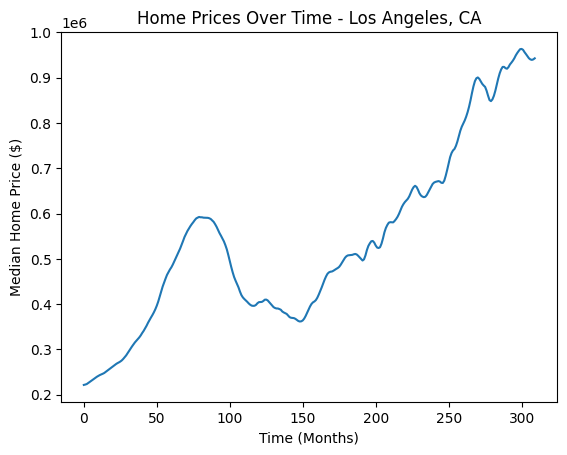

In [20]:
plt.figure()
plt.plot(time, price_data)
plt.title(f"Home Prices Over Time - {city}")
plt.xlabel("Time (Months)")
plt.ylabel("Median Home Price ($)")
plt.show()

In [21]:
growth_rate = (price_data[-1] - price_data[0]) / price_data[0]
growth_rate

np.float64(3.2577257752628705)

In [22]:
X = time.reshape(-1, 1)
y = price_data

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

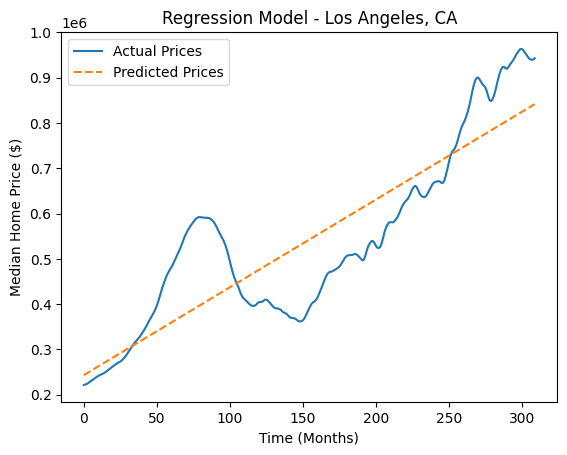

In [23]:
plt.figure()
plt.plot(time, y, label="Actual Prices")
plt.plot(time, y_pred, linestyle="dashed", label="Predicted Prices")
plt.title(f"Regression Model - {city}")
plt.xlabel("Time (Months)")
plt.ylabel("Median Home Price ($)")
plt.legend()
plt.show()

In [24]:
mae = mean_absolute_error(y, y_pred)
mae

86091.7812268361

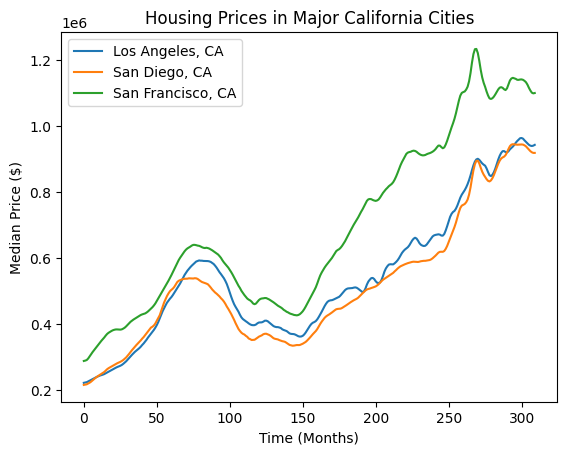

In [26]:
cities = ["Los Angeles, CA", "San Diego, CA", "San Francisco, CA"]

plt.figure()

for c in cities:
    temp = ca_df[ca_df["RegionName"] == c].iloc[0, 5:].values
    plt.plot(temp, label=c)

plt.title("Housing Prices in Major California Cities")
plt.xlabel("Time (Months)")
plt.ylabel("Median Price ($)")
plt.legend()
plt.show()